# This Notebook contains all the statistics we did to get assumptions about the data

## Importing the data

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from proj1_helpers import *
from implementations import *
from costs import *
from process_data_exploration import *

from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Separating by jet values

In [2]:
#We get the data points that have jet = i using boolean indexing
xjet0 = tX[tX[:,22] == 0]
xjet1 =  tX[tX[:,22] == 1]
xjet2 = tX[tX[:,22] == 2]
xjet3 = tX[tX[:,22] == 3]
print(f"There are {xjet0.shape[0]} data points with jet = 0, {xjet1.shape[0]} with jet = 1, {xjet2.shape[0]} with jet = 2, {xjet3.shape[0]} with jet = 3")

There are 99913 data points with jet = 0, 77544 with jet = 1, 50379 with jet = 2, 22164 with jet = 3


## Number of invalid values per jet

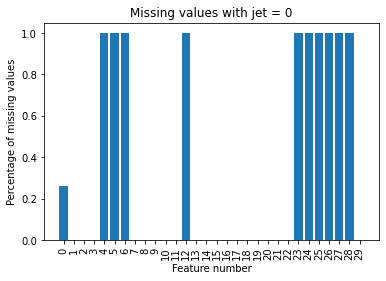

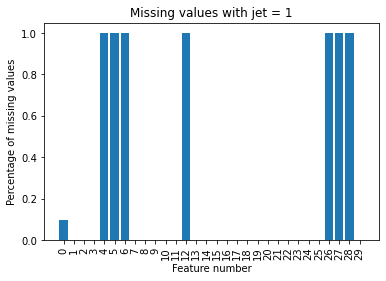

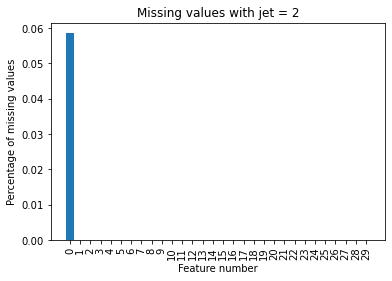

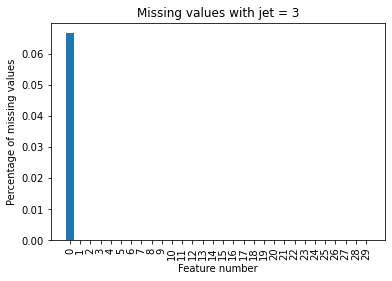

In [3]:
errors0 = np.zeros(30)
errors1 = np.zeros(30)
errors2 = np.zeros(30)
errors3 = np.zeros(30)
features = np.arange(30)
for feature in range(xjet0.shape[1]):
    #Counting the number of -999 per feature
    a = xjet0[:,feature][xjet0[:,feature] == -999]
    errors0[feature] = len(a)
    a = xjet1[:,feature][xjet1[:,feature] == -999]
    errors1[feature] = len(a)
    a = xjet2[:,feature][xjet2[:,feature] == -999]
    errors2[feature] = len(a)
    a = xjet3[:,feature][xjet3[:,feature] == -999]
    errors3[feature] = len(a)

#plot the results
plt.bar(features, errors0/xjet0.shape[0])
plt.xticks(features, features, rotation='vertical')
plt.title("Missing values with jet = 0")
plt.xlabel("Feature number")
plt.ylabel("Percentage of missing values")
plt.show()
plt.bar(features, errors1/xjet1.shape[0])
plt.xticks(features, features, rotation='vertical')
plt.title("Missing values with jet = 1")
plt.xlabel("Feature number")
plt.ylabel("Percentage of missing values")
plt.show()
plt.bar(features, errors2/xjet2.shape[0])
plt.xticks(features, features, rotation='vertical')
plt.title("Missing values with jet = 2")
plt.xlabel("Feature number")
plt.ylabel("Percentage of missing values")
plt.show()
plt.bar(features, errors3/xjet3.shape[0])
plt.xticks(features, features, rotation='vertical')
plt.title("Missing values with jet = 3")
plt.xlabel("Feature number")
plt.ylabel("Percentage of missing values")
plt.show()

## Box plot of features (removing outliers)

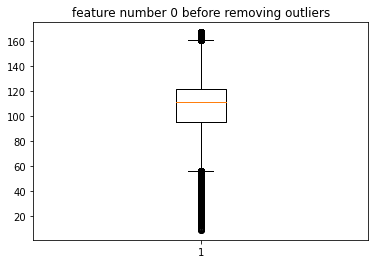

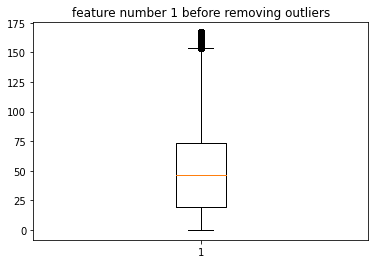

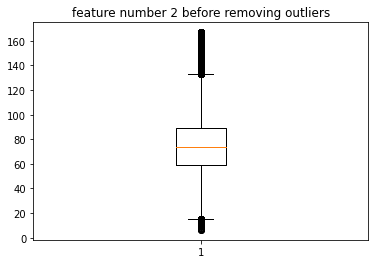

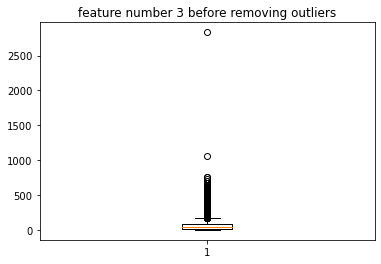

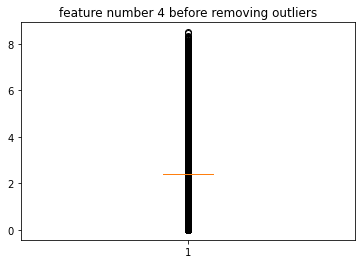

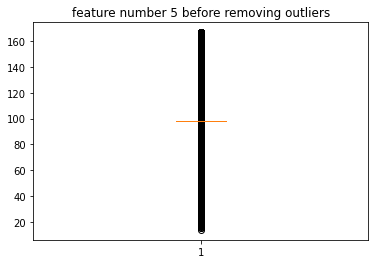

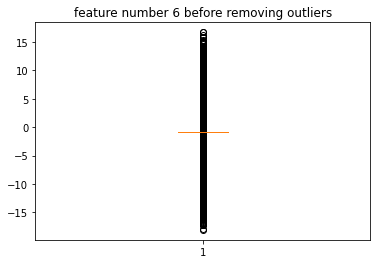

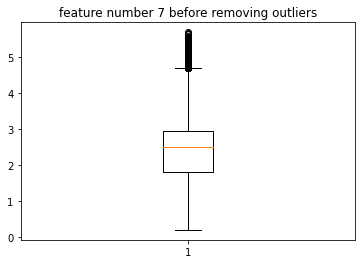

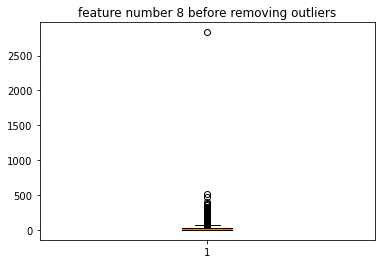

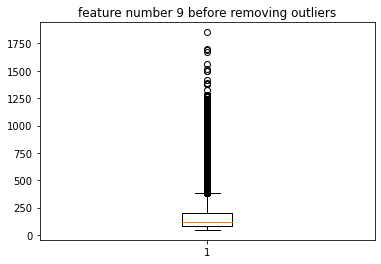

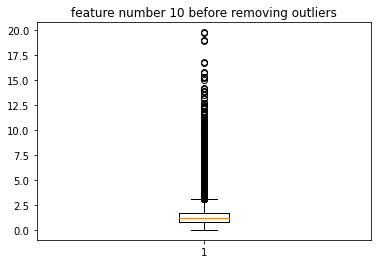

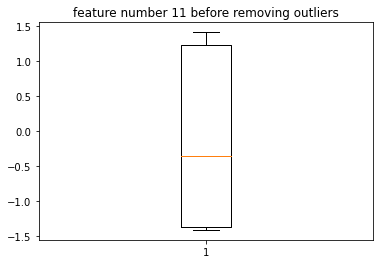

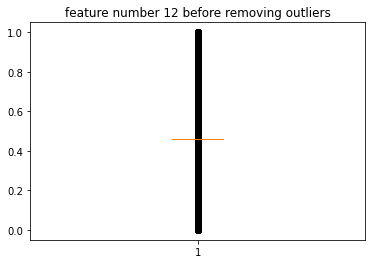

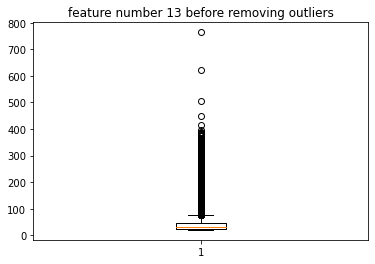

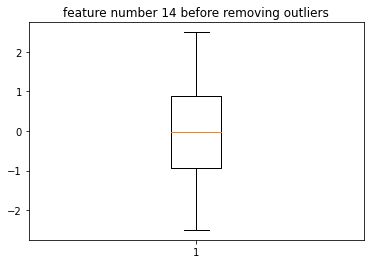

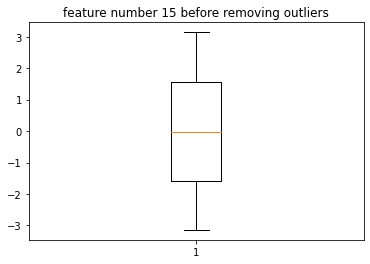

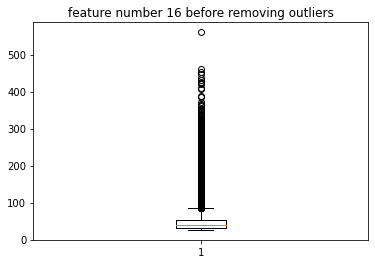

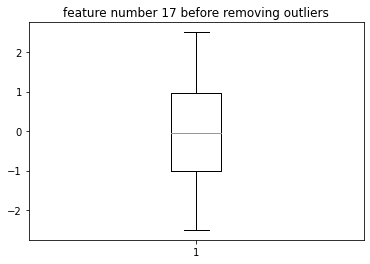

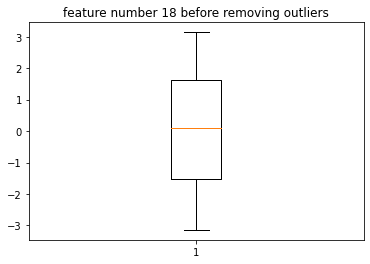

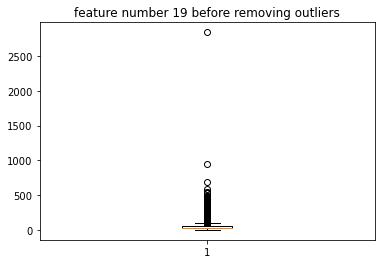

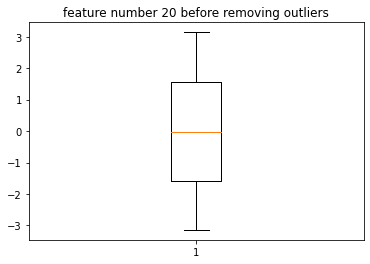

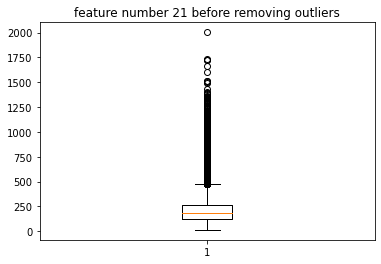

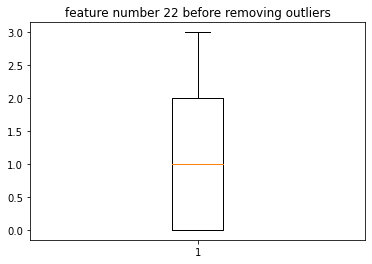

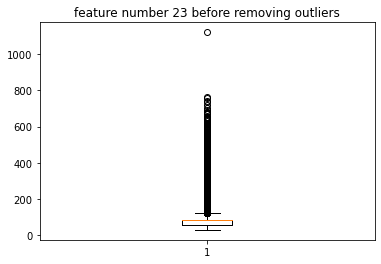

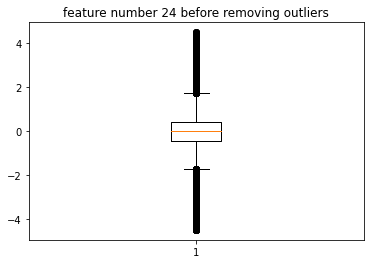

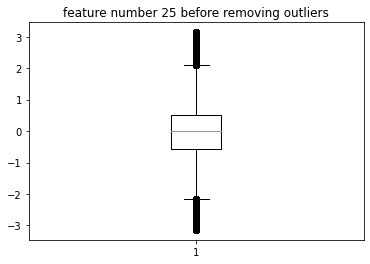

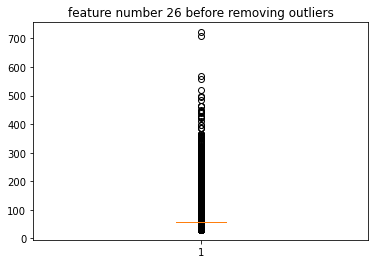

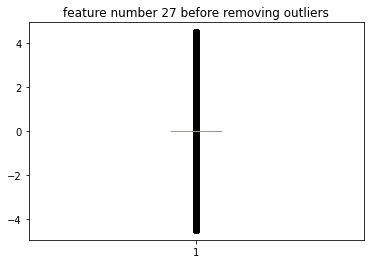

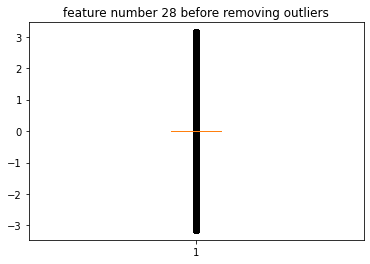

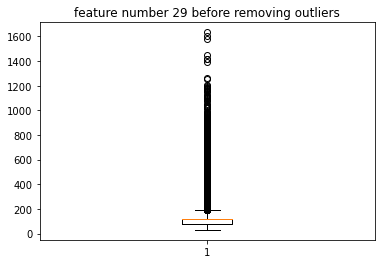

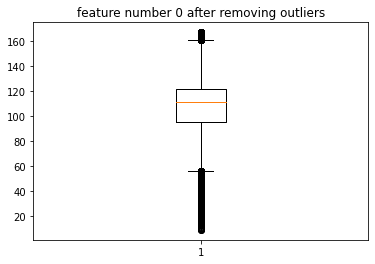

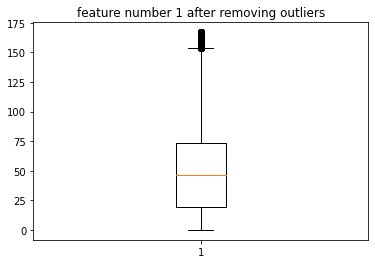

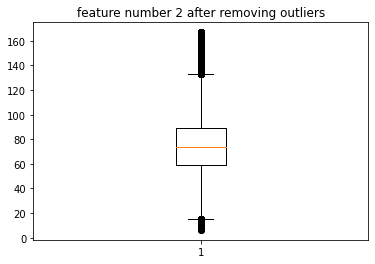

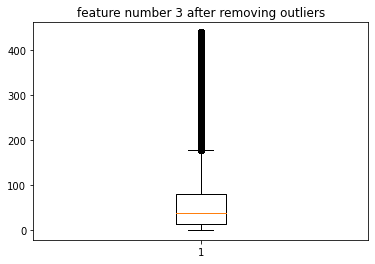

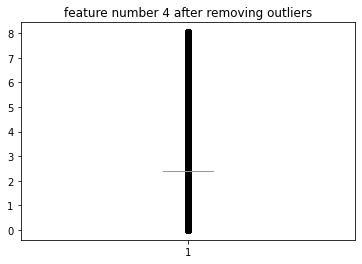

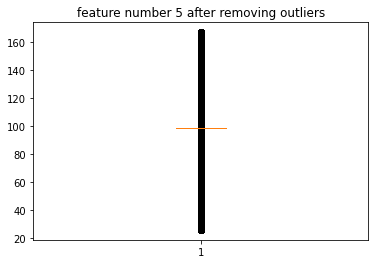

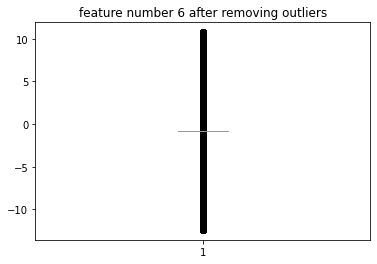

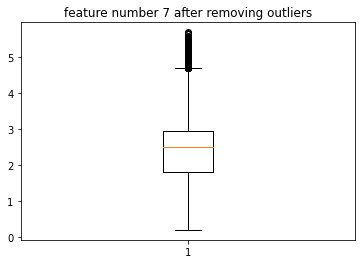

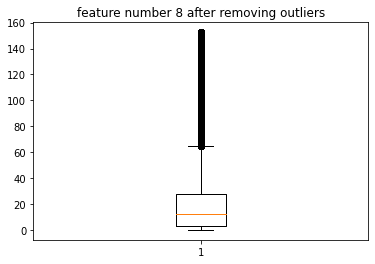

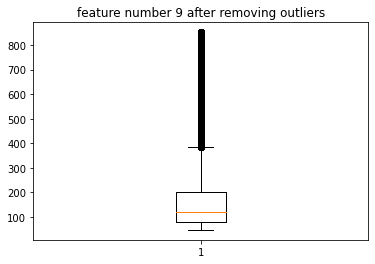

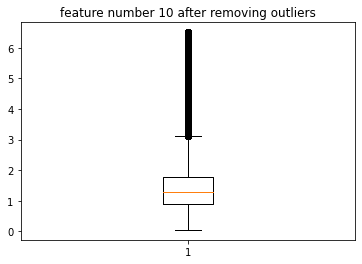

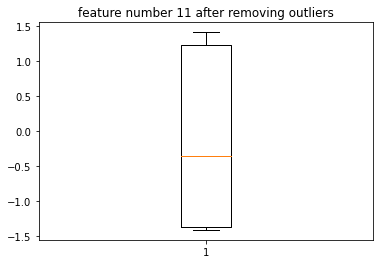

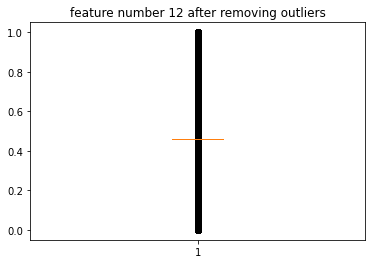

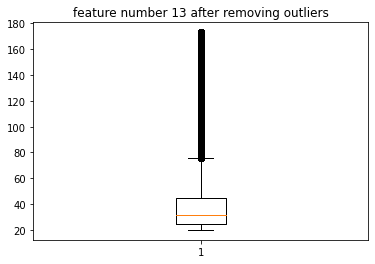

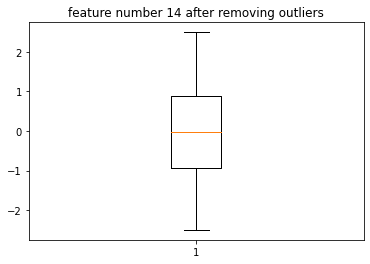

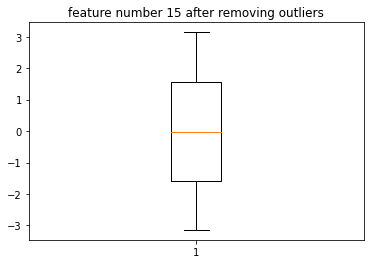

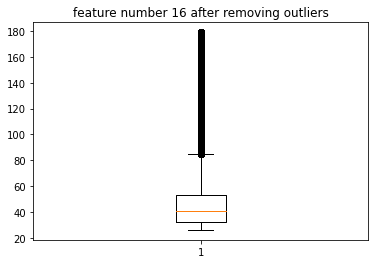

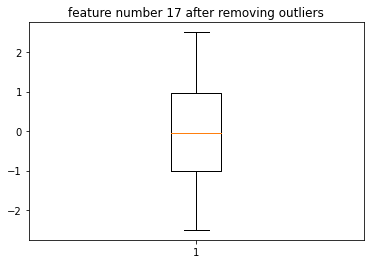

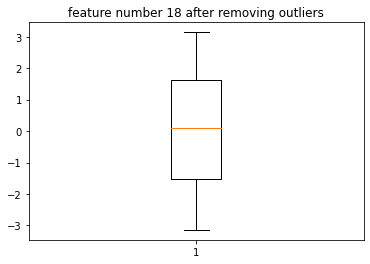

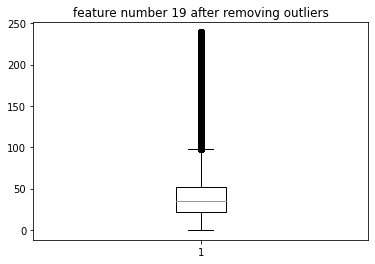

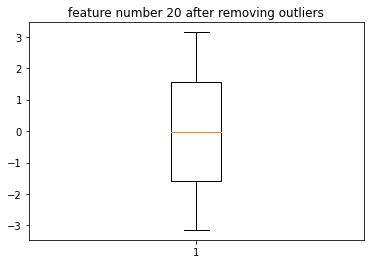

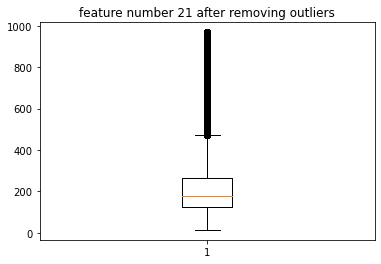

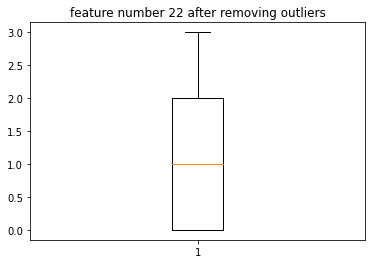

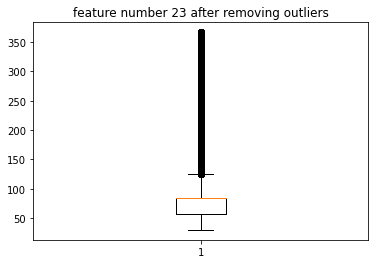

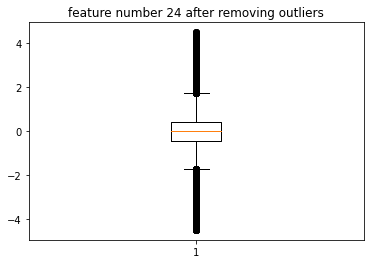

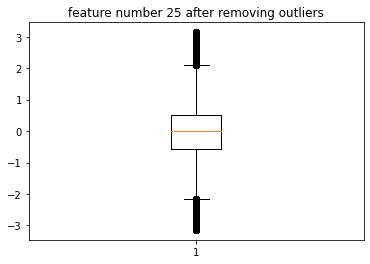

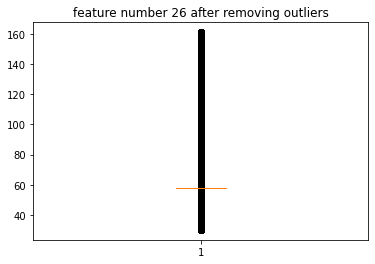

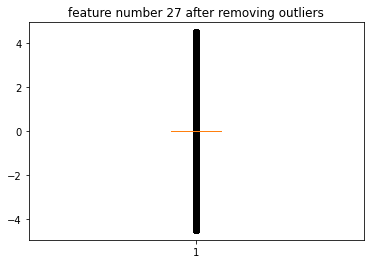

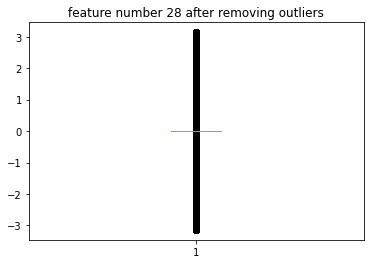

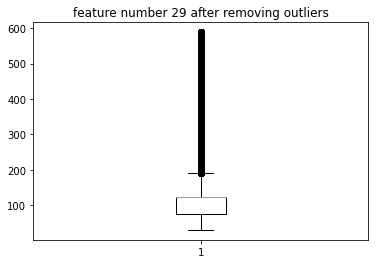

In [4]:
#Remove the -999 from the data
tX_clean = clean(tX)

#feature-wise boxplot
for n in range(tX.shape[1]):
    col = tX_clean[:,n] #take the column of feature i
    plt.boxplot(col)
    plt.title(f"feature number {n} before removing outliers")
    #plt.savefig(f"feature {n} before.png")
    plt.show()

#remove the outliers and replace them by the closest quantile
for feature in range(tX.shape[1]):
    col = tX_clean[:, feature]
    lower = np.mean(col) - (6 * np.std(col))
    higher = np.mean(col) + (6 * np.std(col))
    col[col < lower] = lower
    col[col > higher] = higher
    
#feature-wise boxplot after removing outliers
for n in range(tX.shape[1]):
    col = tX_clean[:,n] #take the column of feature i
    plt.boxplot(col)
    plt.title(f"feature number {n} after removing outliers")
    #plt.savefig(f"feature {n} after.png")
    plt.show()

## Different feature scaling techniques

### Testing results on least squares

In [9]:
#***********CONST*************#
to_discard = ([[4,5,6,12,22,23,24,25,26,27,28,29],[4,5,6,12,22,26,27,28],[22], [22]])
degrees_opti = np.array([1,1,1,1])
lambdas_opti = np.array([10e-8, 10e-8,  10e-8, 10e-8])

def masks(X_tr,X_te,jet_num):
    if (jet_num == 0):
        return (X_tr[:, 22] == jet_num), (X_te[:, 22] == jet_num)
    elif (jet_num == 1):
        return (X_tr[:, 22] == jet_num), (X_te[:, 22] == jet_num)
    elif (jet_num == 2):
        return (X_tr[:, 22] == jet_num), (X_te[:, 22] == jet_num)
    elif (jet_num == 3):
        return (X_tr[:, 22] == jet_num), (X_te[:, 22] == jet_num)
        
    else :
        print("invalid jet_num")
        return   
    
        
#***********MAIN*************#
def main(X_tr, Y_tr, X_te,stand):

    #init final predictions vector
    y_fin = np.zeros(X_te.shape[0])
    #tX_test

    for jet_num in range(4):

        #print(jet_num)
        #initialize the mask according to jet_num
        mask_tr, mask_te = masks(X_tr,X_te,jet_num)


        #param
        features_to_discard = to_discard[jet_num]
        degree = degrees_opti[jet_num]
        lambda_ = lambdas_opti[jet_num]

        #print(features_to_discard,degree, lambda_)
        #filter on jet_num
        ## for training
        x_tr = X_tr[mask_tr]
        y_tr = Y_tr[mask_tr]
        ## for Testing 
        x_te = X_te[mask_te]

        #process
        tx_tr,tx_te = process(x_tr, x_te, jet_num, features_to_discard, degree, stan = stand)

        #train
        w_star, loss_tr = least_squares(y_tr,tx_tr)
        #w_star, loss_tr = least_squares_GD(y_tr, tx_tr, np.zeros(tx_tr.shape[1]), 100000, 10e-7)

        #store in y_pred
        pred = predict_labels(w_star,tx_te)
        y_fin[mask_te] = pred
    print("done")
    return y_fin

#degree = 7

done
79.7264 %
done
79.7664 %
done
78.12 %
done
78.7232 %
done
67.7296 %


Text(0.5, 1.0, 'Multiple feature scaling techniques')

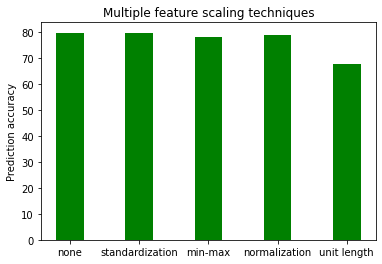

In [26]:
ratio =0.75
x_tr,y_tr,x_te,y_te = split_data(tX, y, ratio, seed=22)
accuracies = []
for stand in range(5):
    y_fin = main(x_tr,y_tr,x_te, stand)
    #See Accuracy
    print(compute_accuracy(y_fin,y_te),"%")
    accuracies.append(compute_accuracy(y_fin,y_te))
    
ticks = ["none", "standardization","min-max","normalization","unit length"]
plt.bar(np.arange(5), accuracies, width = 0.4,color='green')
plt.xticks(np.arange(5),ticks, rotation='horizontal')
plt.ylabel("Prediction accuracy")
plt.title("Multiple feature scaling techniques")